In [1]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/Lung-Cancer
# dataset link : http://archive.ics.uci.edu/ml/datasets/Lung+Cancer
# email : amirsh.nll@gmail.com

In [4]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

In [5]:
def Read_Data(address, Name='*.csv', Sperator=';'):
    Data = pd.read_csv(address+Name, sep=Sperator, header=None)
#    Data = Data.dropna()
    X = Data.drop([0], axis=1)
    Y = Data.iloc[:,0]
    return X, Y

In [6]:
def KNN_Plot(X, Y, n1, n2, knn_title):
    
    '''
    n1 and n2 are Neighbours
    '''
    
    neighbors = np.arange(n1, n2)
    train_acc = np.empty(len(neighbors))
    test_acc = np.empty(len(neighbors))
    
    x_train, x_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        test_size=.2,
                                                        random_state=42,
                                                        stratify=Y)
    
    for i, k in enumerate(neighbors):
        knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance',
                                         algorithm='auto', p=2)
        knn_model.fit(x_train, y_train)
        TAcc = knn_model.score(x_train, y_train)
        TAcc *= 100
        TAcc = float(format(TAcc,'.2f'))
        train_acc[i] = TAcc
        
        pred = knn_model.predict(x_test)
        Test_acc = accuracy_score(y_test, pred)
        Test_acc *= 100
        Test_acc = float(format(Test_acc,'.2f'))
        test_acc[i] = Test_acc
        
    plt.plot(neighbors, train_acc, label='Train Accuracy')
    plt.plot(neighbors, test_acc, label='Test Accuracy')
    plt.legend(loc='best')
    plt.title(knn_title)
    plt.xlabel('Neighbors')
    plt.ylabel('Accuracy (%)')
    plt.xticks(neighbors)
    plt.show()
    
    return knn_model

In [7]:
def NB(x, y):
   
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=.2,
                                                        random_state=42,
                                                        stratify=y)
    
    
    nb_clf = GaussianNB()
    nb_clf.fit(x_train, y_train)
    Predict_nb_clf = nb_clf.predict(x_test)
    Accuracy = accuracy_score(y_test, Predict_nb_clf)
    
    Accuracy *= 100
    print('GaussianNB Accuracy: ')
    print(float(format(Accuracy,'.2f')))
    print('---------------------------------\n')
    
    return Accuracy

In [8]:
def Tree(X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        test_size=.2,
                                                        random_state=42,
                                                        stratify=Y)
    
    clf = tree.DecisionTreeClassifier(random_state=80)
    clf.fit(x_train, y_train)
    
    Predict = clf.predict(x_test)
    Accuracy = accuracy_score(y_test, Predict)

    Accuracy *= 100
    print('DecisionTree Accuracy: ')
    print(float(format(Accuracy,'.2f')))
    print('---------------------------------\n')
    
    return Accuracy

In [80]:
def MLP(X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        test_size=.2,
                                                        random_state=42,
                                                        stratify=Y)
    
    mlp = MLPClassifier(hidden_layer_sizes=(800,), max_iter=1000, random_state=50)
    mlp.fit(x_train, y_train)

    Predict = mlp.predict(x_test)
    Accuracy = accuracy_score(y_test, Predict)

    Accuracy *= 100
    print('MLP Accuracy: ')
    print(float(format(Accuracy,'.2f')))
    print('---------------------------------\n')
    
    return Accuracy

In [81]:
def LogisticRegressionClf(X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        test_size=.2,
                                                        random_state=50,
                                                        stratify=Y)
    
    clf = LogisticRegression(random_state=50, solver='lbfgs', max_iter=200)
    clf.fit(x_train, y_train)
    
    Predict = clf.predict(x_test)
    Accuracy = accuracy_score(y_test, Predict)

    Accuracy *= 100
    print('LogisticRegression Accuracy: ')
    print(float(format(Accuracy,'.2f')))
    print('---------------------------------\n')
    
    return Accuracy

In [82]:
address = 'C:/'
X, Y = Read_Data(address, Name='lc.csv', Sperator=';')
print(X,Y)

    1   2   3   4   5   6   7   8   9   10  ...  47  48  49  50  51  52  53  \
0    0   3   3   1   0   3   1   3   1   1  ...   2   2   2   2   2   2   2   
1    0   3   3   2   0   3   3   3   1   1  ...   2   2   2   2   2   2   2   
2    0   2   3   2   1   3   3   3   1   2  ...   2   2   2   2   2   2   2   
3    0   3   2   1   1   3   3   3   2   2  ...   2   2   2   2   2   2   2   
4    0   3   3   2   0   3   3   3   1   2  ...   2   2   2   2   2   2   2   
5    0   3   2   1   0   3   3   3   1   2  ...   2   2   2   2   1   2   2   
6    0   2   2   1   0   3   1   3   3   3  ...   2   2   1   2   2   2   2   
7    0   3   1   1   0   3   1   3   1   1  ...   2   2   2   2   2   2   2   
8    0   2   3   2   0   2   2   2   1   2  ...   2   2   2   1   3   2   1   
9    0   2   2   0   0   3   2   3   1   1  ...   2   2   2   2   2   2   2   
10   0   2   3   2   0   1   2   1   1   2  ...   2   2   2   2   2   1   1   
11   0   2   1   1   0   1   2   2   1   2  ...   2 

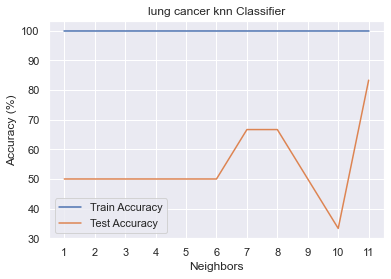

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [83]:
n1 = 1
n2 = 12
knn_title = 'lung cancer knn Classifier'
KNN_Plot(X, Y, n1, n2, knn_title)


In [84]:
Accuracy = NB(X, Y)

GaussianNB Accuracy: 
66.67
---------------------------------



In [85]:
Accuracy = Tree(X, Y)

DecisionTree Accuracy: 
83.33
---------------------------------



In [86]:
Accuracy = MLP(X, Y)

MLP Accuracy: 
16.67
---------------------------------



In [16]:
LGR_Accuraccy = LogisticRegressionClf(X, Y)

LogisticRegression Accuracy: 
50.0
---------------------------------

